<a href="https://colab.research.google.com/github/EvM82/Machine-Learning-25/blob/main/exercise9_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ερώτημα 1

In [20]:
!pip install swig

In [21]:
!pip install gymnasium[box2d]

In [22]:
!pip install renderlab

In [23]:
!pip install stable-baselines3

In [24]:
import numpy as np
import renderlab as rl
import gymnasium as gym
from stable_baselines3 import DQN
from stable_baselines3 import PPO
import matplotlib.pyplot as plt
import time

## Ερώτημα 2

step--> Ειναι συναρτηση που πραγματοποιεί ένα action του πράκτορα, επσιτρέφει το reward αυτης της πράξης και τις νέες παρατηρησεις που προκύπτουν από το action του πράκτορα. Επισης ελέγχει εάν έφτασε σε τερματισμό ή οχι του προβλήματος/διαδικασίας.
<br>
</br>
reset--> Είναι συνάρτηση που επαναφέρει το περιβάλλον σε αρχική κατάσταση, προσθέτωντας τυχαιότητα, για να εξερευνήσει ο πράκτορας το περιβάλλον από τη νέα του θέση. Καλείται όταν έχει γίνει τερματισμός ή διακοπή επεισοδίου και πριν κληθεί η step για το νέο επεισόδιο.
<br>
</br>
render -->περιγράφει/οπτικοποιεί το περιβάλλον, βάση επιλεγμένου render_mode, κυρίως από  την ανθωρπινη οπτική.

## Ερώτημα 3

a. Observation Spce--> το σύστημα έχει 8 συντεταγμένες που περιγράφουν τη θέση, την ταχύτητα, τον προσανατολισμό και την κατάσταση επαφής του σκάφους με το έδαφος.
<br>
</br>
b. Action Spce--> υπάρχουν 4 διαθέσιμες επλογές. 0: δεν κάνει τίποτα, 1: ενεργοποίηση του αριστερού πλάγιου κινητήρα (περιστροφή του σκάφους δεξιά), 2:ενεργοποιεί κεντρικό κινητηρα και άρα κινείται μπροστά, 3:ενεργοποίηση του δεξιου πλάγιου κινητήρα (περιστροφή του σκάφους αριστερά)
<br>
</br>
c. Reward Function--> Υπολογίζεται μετά από κάθε step. Αυξάνεται εάν πάει πιο κοντά στο landing pad και εάν κινείται πιο αργά και μειώνεται εάν απομακρυνθεί από το landing pad ή πάει πιο γρήγρα.

Αυξάνεται κατά 10 μονάδες αν ένα από τα πόδια ακουμπήσουν στο έδαφος και αντίστοιχα μειώνεται αν υπάρξει κλίση.
Μειωνεται κατα 0.03 αν πυρωδωτηθεί μια από τις 2 μηχανές (αριστερη, δεξιά) και μειώνεται κατά 0.3 εάν  ενεργοποιείται ο κύριος κινητήρας.

Το επεισόδιο λαμβάνει επιπλέον +100 σε επιτυχή προσγείωση και −100 σε περίπτωση σύγκρουσης. Ένα επεισόδιο Θεωρείται ότι τερματίζει με επιτυχία αν λάβει τουλάχιοστον 200 βαθμούς rewards συνολικά.






## Ερώτημα 4

In [25]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output")

observation, info = env.reset()

while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        break

env.play()
env.close()


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  96%|█████████▌| 75/78 [00:00<00:00, 194.79it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output/1768432471.5584886.mp4, 720000 bytes wanted but 0 bytes read,at frame 77/78, at time 2.57/2.57 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


## Ερώτημα 5

In [26]:
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output")

num_episodes = 5
episode_scores = []

for episode in range(num_episodes):
    observation, info = env.reset()
    total_reward = 0

    while True:
        action = env.action_space.sample()
        observation, reward, terminated, truncated, info = env.step(action)

        total_reward += reward

        if terminated or truncated:
            break

    episode_scores.append(total_reward)
env.play()
env.close()

mean_score = np.mean(episode_scores)
print(mean_score)


Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


-178.7165879761019


## Ερώτημα 6

6α. DQN

In [35]:
env = gym.make("LunarLander-v3")
start = time.time()

model_dqn = DQN("MlpPolicy", env, verbose=1)
model_dqn.learn(total_timesteps=5000)

dqn_training_time = time.time() - start
model_dqn.save("dqn_model")
dqn_training_rewards = [ep["r"] for ep in model_dqn.ep_info_buffer]

print("time DQN:", dqn_training_time)
print("episodes DQN:", len(dqn_training_rewards))

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 71       |
|    ep_rew_mean      | -315     |
|    exploration_rate | 0.46     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1559     |
|    time_elapsed     | 0        |
|    total_timesteps  | 284      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.81     |
|    n_updates        | 45       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 68.5     |
|    ep_rew_mean      | -343     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1231     |
|    time_elapsed     | 0        |
|    total_timesteps  | 548      |
| train/              |        

6b. PPO

In [34]:
env = gym.make("LunarLander-v3")

start = time.time()

model_ppo = PPO("MlpPolicy", env, verbose=1)
model_ppo.learn(total_timesteps=5000)

ppo_training_time = time.time() - start

model_ppo.save("ppo_model")

ppo_training_rewards = [ep["r"] for ep in model_ppo.ep_info_buffer]

print("time PPO:", ppo_training_time)
print("episodes PPO:", len(ppo_training_rewards))

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 81.7     |
|    ep_rew_mean     | -146     |
| time/              |          |
|    fps             | 1111     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 86.4        |
|    ep_rew_mean          | -143        |
| time/                   |             |
|    fps                  | 815         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006047218 |
|    clip_fraction        | 0.0172      |
|    clip_range           | 0.2         |
|    entropy_loss   

 Ο κώδικας εκπαιδεύει το μοντέλο, μετρά τον χρόνο εκπαίδευσης με τη χρήση της time, και καταγράφει τα rewards ανά επεισόδιο, τα οποία θα χρησιμοποιηθούν παρκάτω στην δημιουργία των σχετικών γραφημάτων.

## Ερώτημα 7

Το παρακάτω τμήμα κώδικα εκτελεί αξιολόγηση του εκπαιδευμένου μοντέλου DQN/PPO σε 5 επεισόδια.
Για κάθε επεισόδιο, γίνεται επαναφορά του περιβάλλοντος (env.reset()) και το μοντέλο προβλέπει δράσεις, οι οποίες εφαρμόζονται στο περιβάλλον (env.step) και καταγράφεται το συνολικό reward. Όταν το επεισόδιο ολοκληρωθεί, προστίθεται το συνολικό reward στη λίστα και στο τέλος, η λίστα θα έχει τα rewards των 5 επεισοδίων, από τα οποία υπολογίζεται ο μέσος όρος απόδοσης του πράκτορα.

reward DQN: -227.0105207106339
reward PPO: -711.6282775422753


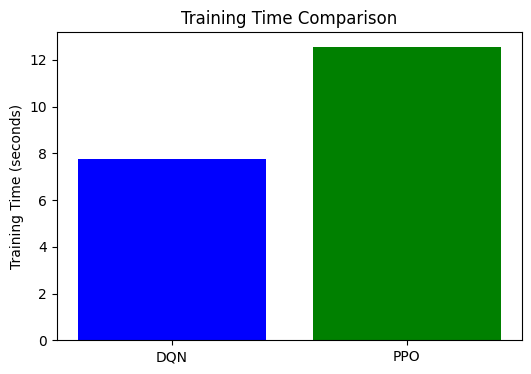

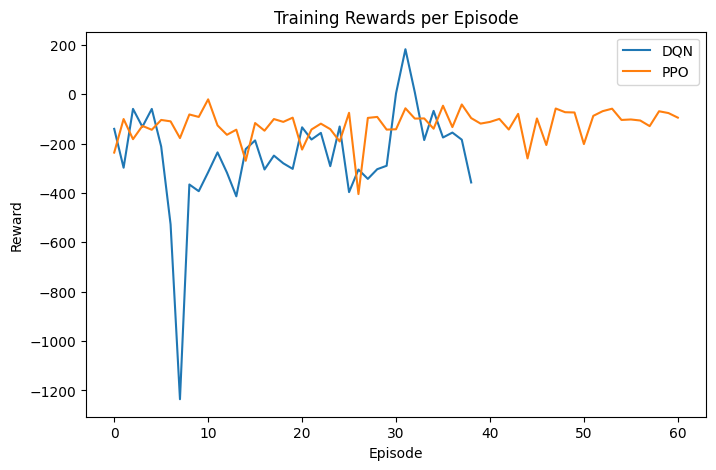

In [30]:
dqn = DQN.load("dqn_model")
ppo = PPO.load("ppo_model")

env = gym.make("LunarLander-v3")


# Evaluation (DQN)
dqn_rewards_eval = []
for _ in range(5):
    observations, info = env.reset()
    done = False
    total_r = 0
    while not done:
        action, _ = dqn.predict(observations, deterministic=True)
        observations, reward, terminated, truncated, info = env.step(action)
        total_r += reward
        done = terminated or truncated
    dqn_rewards_eval.append(total_r)

dqn_mean_reward = sum(dqn_rewards_eval) / len(dqn_rewards_eval)


# Evaluation (PPO)
ppo_rewards_eval = []
for _ in range(5):
    observations, info = env.reset()
    done = False
    total_r = 0
    while not done:
        action, _ = ppo.predict(observations, deterministic=True)
        observations, reward, terminated, truncated, info = env.step(action)
        total_r += reward
        done = terminated or truncated
    ppo_rewards_eval.append(total_r)

ppo_mean_reward = sum(ppo_rewards_eval) / len(ppo_rewards_eval)

print("reward DQN:", dqn_mean_reward)
print("reward PPO:", ppo_mean_reward)



# Training Time
plt.figure(figsize=(6,4))
plt.bar(["DQN", "PPO"], [dqn_training_time, ppo_training_time], color=["blue", "green"])
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison")
plt.show()

# Rewards per Episode
plt.figure(figsize=(8,5))
plt.plot(dqn_training_rewards, label="DQN")
plt.plot(ppo_training_rewards, label="PPO")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Training Rewards per Episode")
plt.legend()
plt.show()


Παρατηρείται ότι το DQN εκπαιδεύεται πιο γρήγορα από το PPO.
<br>
</br>
Επίσης o Ο PPO φαίνεται να μαθαίνει πιο σταθερά γιατί έχει πιο σταθερή καμπύλη, ενώ ο DQN έχει μεγάλες διακυμάνσεις και περισσότερα αρνητικά rewards, παρόλα αυτά, στις τιμές των mean_rewrads καλύτερο φαίνεται να είναι το DQN.

## Ερωτημα 8

DQN

Γίνεται επανεκπαίδευση DQN χρησιμοποιώντας νέες παραμέτρους. Οι αλλαγές αφορούν το learning rate, το buffer size, το batch size, τη συχνότητα εκπαίδευσης και τις παραμέτρους εξερεύνησης.

In [31]:
env = gym.make("LunarLander-v3")

start = time.time()

model_dqn_opt = DQN(
    "MlpPolicy",
    env,
    learning_rate=1e-4,
    buffer_size=100000,
    learning_starts=1000,
    batch_size=64,
    gamma=0.99,
    train_freq=4,
    target_update_interval=1000,
    exploration_fraction=0.1,
    exploration_final_eps=0.02,
    verbose=1
)

model_dqn_opt.learn(total_timesteps=50000)
dqn_opt_training_time = time.time() - start

model_dqn_opt.save("dqn_model_optimized")

dqn_opt_training_rewards = [ep["r"] for ep in model_dqn_opt.ep_info_buffer]


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 93.5     |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.927    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 5845     |
|    time_elapsed     | 0        |
|    total_timesteps  | 374      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.6     |
|    ep_rew_mean      | -162     |
|    exploration_rate | 0.85     |
| time/               |          |
|    episodes         | 8        |
|    fps              | 5091     |
|    time_elapsed     | 0        |
|    total_timesteps  | 765      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.4     |
|    ep_rew_mean      | -173   

PPO

Επανεκπαίδευση με τις  νέες παραμετρους. Οι αλλαγές αφορούν το learning rate, τον αριθμό βημάτων ανά update, το batch size, τον αριθμό epochs, καθώς και παραμέτρους όπως το gamma, το GAE λ και το clip range.

In [32]:
env = gym.make("LunarLander-v3")

start = time.time()

model_ppo_opt = PPO(
    "MlpPolicy",
    env,
    learning_rate=3e-4,
    n_steps=2048,
    batch_size=64,
    n_epochs=10,
    gamma=0.999,
    gae_lambda=0.95,
    clip_range=0.2,
    ent_coef=0.01,
    verbose=1
)

model_ppo_opt.learn(total_timesteps=50000)
ppo_opt_training_time = time.time() - start

model_ppo_opt.save("ppo_model_optimized")

ppo_opt_training_rewards = [ep["r"] for ep in model_ppo_opt.ep_info_buffer]


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 93       |
|    ep_rew_mean     | -190     |
| time/              |          |
|    fps             | 1012     |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 91.6        |
|    ep_rew_mean          | -184        |
| time/                   |             |
|    fps                  | 791         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006833709 |
|    clip_fraction        | 0.0306      |
|    clip_range           | 0.2         |
|    entropy_loss   

Παρακάτω γίνεται evaluation των δύο μοντέλων, και δημιουργούνται τα δύο γραφληματα χρόνου και rewards.

Optimized DQN mean reward: -27.670798895380848
Optimized PPO mean reward: -264.4157530982031


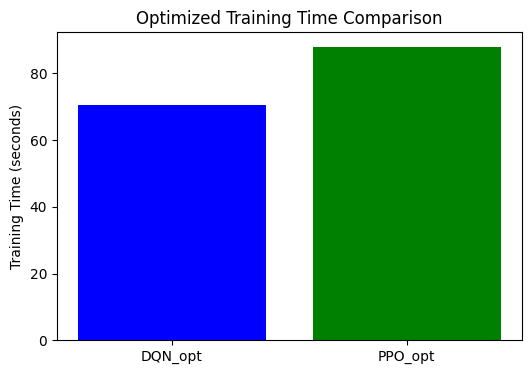

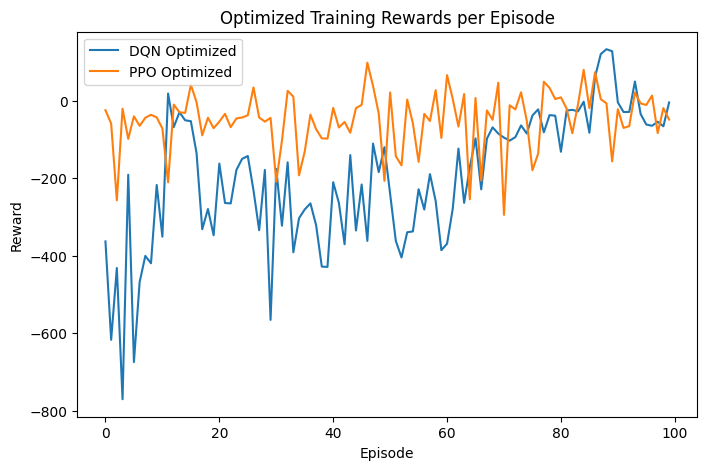

In [33]:
env = gym.make("LunarLander-v3")
dqn_opt = DQN.load("dqn_model_optimized")
ppo_opt = PPO.load("ppo_model_optimized")

# Evaluation DQN
dqn_opt_eval = []
for _ in range(5):
    obs, info = env.reset()
    done = False
    total_r = 0
    while not done:
        action, _ = dqn_opt.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        total_r += reward
        done = terminated or truncated
    dqn_opt_eval.append(total_r)

# Evaluation PPO
ppo_opt_eval = []
for _ in range(5):
    obs, info = env.reset()
    done = False
    total_r = 0
    while not done:
        action, _ = ppo_opt.predict(obs, deterministic=True)
        obs, reward, terminated, truncated, info = env.step(action)
        total_r += reward
        done = terminated or truncated
    ppo_opt_eval.append(total_r)

print("Optimized DQN mean reward:", sum(dqn_opt_eval)/len(dqn_opt_eval))
print("Optimized PPO mean reward:", sum(ppo_opt_eval)/len(ppo_opt_eval))


# Training time
plt.figure(figsize=(6,4))
plt.bar(["DQN_opt", "PPO_opt"], [dqn_opt_training_time, ppo_opt_training_time], color=["blue", "green"])
plt.ylabel("Training Time (seconds)")
plt.title("Optimized Training Time Comparison")
plt.show()

# Rewards
plt.figure(figsize=(8,5))
plt.plot(dqn_opt_training_rewards, label="DQN Optimized")
plt.plot(ppo_opt_training_rewards, label="PPO Optimized")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("Optimized Training Rewards per Episode")
plt.legend()
plt.show()


Παρατηρείται ότι, όπως και στην προηγούμενη περίπτωση, ο αλγόριθμος PPO απαιτεί περισσότερο χρόνο εκπαίδευσης σε σχέση με τον DQN. Ωστόσο, και τα δύο μοντέλα παρουσιάζουν αυξημένο συνολικό χρόνο εκπαίδευσης, κάτι που είναι αναμενόμενο λόγω των τροποποιημένων παραμέτρων που αυξάνουν το υπολογιστικό κόστος.

Επιπλέον, παρατηρείται γενική αύξηση των rewards ανά επεισόδιο και για τους δύο αλγορίθμους. Τέλος, τα επεισοδια 40–60 περίπου, οι καμπύλες των μοντέλων αποκλίνουν περισσότερο σε σχέση με την προηγούμενη εκπαίδευση, κάτι που σημαίνει πιο διαφορετική διαδικασία εκπαίδευσης σε σχέση με το προηγούμενο ερώτημα.